### Telco Customer Churn (11.3.3+)
### EDA and ML Project
This is a capstone project completed as part of the Fullstack Academy data analyst bootcamp. Excel, Python, and Tableau were used for exploratory data analysis, machine learning prediction, and data visualization.

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

##### Machine Learning Models:
> Logistic Regression
>
> LinearSVM
>
> Random Forest Classifier
> 
> XGBoost Classifier
>
> Decision Tree Classifier

#### LINKS:
##### [Dataset from IBM Cognos Analytics](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)
##### [Medium article](https://medium.com/@justinpeter/customer-churn-ai-using-machine-learning-to-identify-risks-and-opportunities-b1d400a8739c)
##### [Justin Gunderson LinkedIn Profile](https://www.linkedin.com/in/justin-p-gunderson/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in the dataset

The provided dataset contains 6 files: 
- Telco_customer_churn_demographics.xlsx
- Telco_customer_churn_location.xlsx
- Telco_customer_churn_population.xlsx
- Telco_customer_churn_services.xlsx
- Telco_customer_churn_status.xlsx

I reviewed these tables, and decided to create a single `csv` containing fields relevant to customer demographics, provided services, and customer feedback data.

##### [Download file: telco-churn-ml.csv on kaggle](https://www.kaggle.com/datasets/justingunderson/telco-customer-churn)

In [2]:
# IMPORT
telco = pd.read_csv('Telco-churn-ml.csv')
telco.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,CLTV,Churn
0,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,3239,1
1,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,2701,1
2,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,5372,1
3,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,5003,1
4,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5340,1


#### Exploratory Data Analysis and Cleaning
- Transform text objects to integers for ML analysis
- Check for NULL or missing values
- Examine counts of Renewed vs. Churned customers

In [3]:
# Use label encoder to transform text into integer
from sklearn.preprocessing import LabelEncoder

df = telco.apply(LabelEncoder().fit_transform)
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,CLTV,Churn
0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,867,1
1,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,729,486,1
2,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,1274,2587,1
3,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,1371,2260,1
4,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,1349,2556,1


#### Examining the Transformed Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Senior Citizen     7043 non-null   int64
 1   Partner            7043 non-null   int64
 2   Dependents         7043 non-null   int64
 3   Tenure Months      7043 non-null   int64
 4   Phone Service      7043 non-null   int64
 5   Multiple Lines     7043 non-null   int64
 6   Internet Service   7043 non-null   int64
 7   Online Security    7043 non-null   int64
 8   Online Backup      7043 non-null   int64
 9   Device Protection  7043 non-null   int64
 10  Tech Support       7043 non-null   int64
 11  Streaming TV       7043 non-null   int64
 12  Streaming Movies   7043 non-null   int64
 13  Contract           7043 non-null   int64
 14  Paperless Billing  7043 non-null   int64
 15  Payment Method     7043 non-null   int64
 16  Monthly Charges    7043 non-null   int64
 17  CLTV          

In [5]:
df.describe()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,CLTV,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.231010,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,1798.329831,0.265370
std,0.368612,0.499748,0.421508,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,940.752044,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1024.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,1855.000000,0.000000
75%,0.000000,1.000000,0.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,2593.500000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,3437.000000,1.000000


In [6]:
# EDA: Count Renewed vs. Churned Customers
# 0 = Renewed
# 1 = Churned

churn = df['Churn'].value_counts()
print('\n____ Renewed vs Churned Count ____\n')
churn


____ Renewed vs Churned Count ____



0    5174
1    1869
Name: Churn, dtype: int64

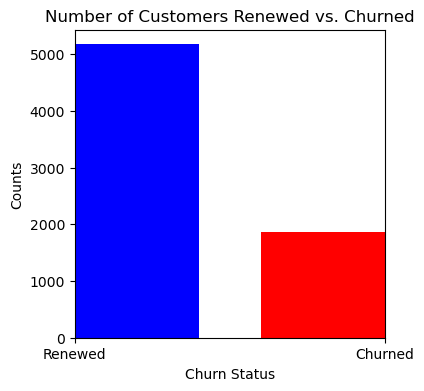

In [7]:
# EDA: Barchart Renewed vs. Churned Customers

x = churn.index
y = churn.values

plt.figure(figsize=(4,4))
plt.bar(x, y, color=['blue', 'red'])
plt.xlim(0, 1)
plt.xticks([0, 1], ['Renewed', 'Churned'])

# set the labels for the x and y axis
plt.xlabel('Churn Status')
plt.ylabel('Counts')

# set the title for the plot
plt.title('Number of Customers Renewed vs. Churned')

# show the plot
plt.show()


#### Machine Learning Models
Now that we have clean data, we'll import our models, fit, and score them.

In [8]:
# ------------------------------
# IMPORT MACHINE LEARNING MODELS
# ------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# ------------------------------
# SET ML ALIASES
# ------------------------------

lr = LogisticRegression()
svm = LinearSVC()
rf = RandomForestClassifier()
xg = XGBClassifier()
dt = DecisionTreeClassifier()

print('\nDone!')


Done!


In [9]:
# ------------------------------
# TRAIN / TEST SPLIT
# ------------------------------

from sklearn.model_selection import train_test_split

# SET TRAIN, TEST GROUPS with 80/20 split
train, test = train_test_split(df, test_size = 0.2)

# IDENTIFY FEATURES / INPUT / HYPOTHESIS / INDEPENDENT VARIABLE
train_feat = train.iloc[:,:18]

# IDENTIFY TARGET / OUTPUT / CONCLUSION / DEPENDENT VARIABLE
train_targ = train['Churn']


# IDENTIFY TEST FEATURES / TARGET
test_feat = test.iloc[:,:18]
test_targ = test['Churn']


print('\n____ DATA SHAPE ____\n')
print('Train feature/test shape:', train_feat.shape, train_targ.shape)
print('Test feature/test shape:', test_feat.shape, test_targ.shape)


print('\nTraining dataset:',train.shape)
print('Testing dataset:',test.shape)


print('\nDone!')


____ DATA SHAPE ____

Train feature/test shape: (5634, 18) (5634,)
Test feature/test shape: (1409, 18) (1409,)

Training dataset: (5634, 19)
Testing dataset: (1409, 19)

Done!


In [10]:
# ------------------------------
# TURN ON THE MACHINE // FIT THE MODELS
# ------------------------------

lr.fit(train_feat, train_targ)
svm.fit(train_feat, train_targ)
rf.fit(train_feat, train_targ)
xg.fit(train_feat, train_targ)
dt.fit(train_feat, train_targ)

print("\n ^^ don't worry about those warnings ^^\n")
print('\n...your training is complete!')

/Users/justingunderson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/justingunderson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



 ^^ don't worry about those warnings ^^


...your training is complete!


In [11]:
# ------------------
# SCORE THE MODELS // TRAINING vs. TESTING RESULT
# ------------------

print('\n____ PREDICTION MODEL ACCURACY ____\n')

print("Logistic Regression | Train:",round((lr.score(train_feat, train_targ) * 100),3),"%")
print("Logistic Regression | Test:",round((lr.score(test_feat, test_targ) * 100),3),"% \n")

print("LinearSVM Regression | Train:",round((svm.score(train_feat, train_targ) * 100),3),"%")
print("Linear SVM Regression | Test:",round((svm.score(test_feat, test_targ) * 100),3),"% \n")

print("Random Forest Classifier | Train:",round((rf.score(train_feat, train_targ) * 100),3),"%")
print("Random Forest Classifier | Test:",round((rf.score(test_feat, test_targ) * 100),3),"% \n")

print("XGBoost Classifier | Train:",round((xg.score(train_feat, train_targ) * 100),3),"%")
print("XGBoost Classifier | Test:",round((xg.score(test_feat, test_targ) * 100),3),"% \n")

print("Decision Tree Classifier | Train:",round((dt.score(train_feat, train_targ) * 100),3),"%")
print("Decision Tree Classifier | Test:",round((dt.score(test_feat, test_targ) * 100),3),"% \n")



____ PREDICTION MODEL ACCURACY ____

Logistic Regression | Train: 80.848 %
Logistic Regression | Test: 80.908 % 

LinearSVM Regression | Train: 50.799 %
Linear SVM Regression | Test: 52.874 % 

Random Forest Classifier | Train: 100.0 %
Random Forest Classifier | Test: 80.837 % 

XGBoost Classifier | Train: 96.255 %
XGBoost Classifier | Test: 80.767 % 

Decision Tree Classifier | Train: 100.0 %
Decision Tree Classifier | Test: 73.101 % 



In [12]:
# PREDICTIONS: CONFUSION MATRIX

from sklearn.metrics import confusion_matrix

cf_lr = confusion_matrix(lr.predict(test_feat),test_targ)
cf_svm = confusion_matrix(svm.predict(test_feat),test_targ)
cf_rf = confusion_matrix(rf.predict(test_feat),test_targ)
cf_xg = confusion_matrix(xg.predict(test_feat),test_targ)
cf_dt = confusion_matrix(dt.predict(test_feat),test_targ)

print('\n____ RESULTS CONFUSION MATRIX ____\n')

print('Logistic Regression Array:\n', cf_lr)
print('\nLinear SVM Regression Array:\n', cf_svm)
print('\nRandom Forest Classifier Array:\n', cf_rf)
print('\nXGBoost Classifier Array:\n', cf_xg)
print('\nDecision Tree Classifier Array:\n', cf_dt)



____ RESULTS CONFUSION MATRIX ____

Logistic Regression Array:
 [[941 164]
 [105 199]]

Linear SVM Regression Array:
 [[400  18]
 [646 345]]

Random Forest Classifier Array:
 [[944 168]
 [102 195]]

XGBoost Classifier Array:
 [[935 160]
 [111 203]]

Decision Tree Classifier Array:
 [[850 183]
 [196 180]]


## Confusion Matrix Results

##### Business Context:
>In the case of Customer Churn, 
>
>`False Negative` is the ***least desirable*** result in a prediction model. 
>
>The customer was incorrectly forecast to be retained, and the *actual* result is churn.

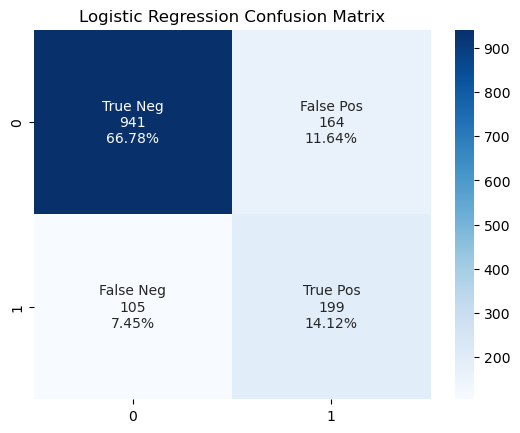

In [13]:
# CONFUSION MATRIX  //  LOGISTIC REGRESSION

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_lr.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_lr.flatten()/np.sum(cf_lr)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_lr, annot = labels, fmt = '', cmap = 'Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

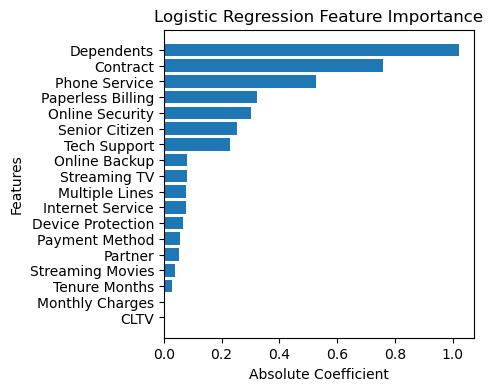

In [14]:
# FEATURE IMPORTANCE // LOGISTIC REGRESSION

# NOTE: LogisticRegression() model does not have a lr.feature_importance_ attribute,
# so we use absolute values of coefficients as a proxy

# Calculate absolute feature coefficients
coeff_abs = np.abs(lr.coef_[0])

# Create dataframe with feature names and coefficients
coeff_df = pd.DataFrame({'Feature': train_feat.columns, 'Coefficient': coeff_abs})

# Sort features by coefficient magnitude
coeff_df = coeff_df.sort_values('Coefficient', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(4,4))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'])
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.show()


In [15]:
# FEATURE IMPORTANCE // LOGISTIC REGRESSION  // SUMMARY

print('Logistic Regression Feature Importance:\n')
for i,v in enumerate(coeff_abs):
    print('Feature: %0d, Score: %.5f' % (i,v))
    

Logistic Regression Feature Importance:

Feature: 0, Score: 0.25441
Feature: 1, Score: 0.05250
Feature: 2, Score: 1.02235
Feature: 3, Score: 0.02787
Feature: 4, Score: 0.52741
Feature: 5, Score: 0.07763
Feature: 6, Score: 0.07719
Feature: 7, Score: 0.30296
Feature: 8, Score: 0.08030
Feature: 9, Score: 0.06796
Feature: 10, Score: 0.23095
Feature: 11, Score: 0.07958
Feature: 12, Score: 0.03733
Feature: 13, Score: 0.75778
Feature: 14, Score: 0.32408
Feature: 15, Score: 0.05614
Feature: 16, Score: 0.00112
Feature: 17, Score: 0.00000


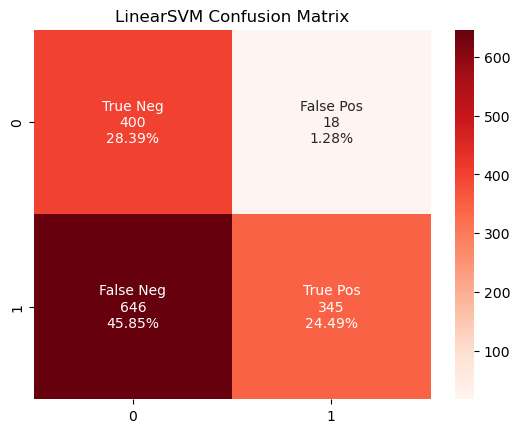

In [16]:
# CONFUSION MATRIX  //  LINEAR SVM REGRESSION

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_svm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_svm.flatten()/np.sum(cf_svm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_svm, annot = labels, fmt = '', cmap = 'Reds')
plt.title('LinearSVM Confusion Matrix')
plt.show()

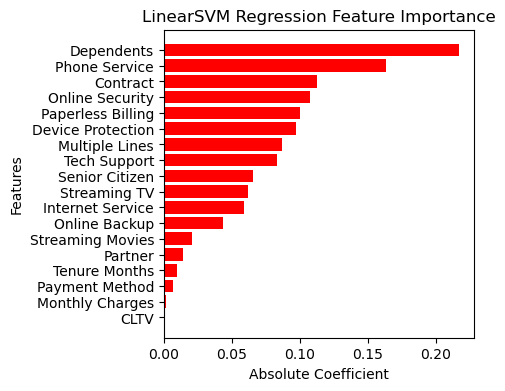

In [17]:
# FEATURE IMPORTANCE // LINEAR REGRESSION

# Calculate absolute feature coefficients
coeff_abs = np.abs(svm.coef_[0])

# Create dataframe with feature names and coefficients
coeff_df = pd.DataFrame({'Feature': train_feat.columns, 'Coefficient': coeff_abs})

# Sort features by coefficient magnitude
coeff_df = coeff_df.sort_values('Coefficient', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(4,4))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color = 'r')
plt.title('LinearSVM Regression Feature Importance')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.show()


In [18]:
# FEATURE IMPORTANCE // LINEAR REGRESSION  //  SUMMARY

print('Linear Regression Feature Importance:\n')
for i,v in enumerate(coeff_abs):
    print('Feature: %0d, Score: %.5f' % (i,v))
    

Linear Regression Feature Importance:

Feature: 0, Score: 0.06525
Feature: 1, Score: 0.01391
Feature: 2, Score: 0.21701
Feature: 3, Score: 0.00995
Feature: 4, Score: 0.16317
Feature: 5, Score: 0.08664
Feature: 6, Score: 0.05896
Feature: 7, Score: 0.10775
Feature: 8, Score: 0.04339
Feature: 9, Score: 0.09706
Feature: 10, Score: 0.08307
Feature: 11, Score: 0.06205
Feature: 12, Score: 0.02045
Feature: 13, Score: 0.11236
Feature: 14, Score: 0.10018
Feature: 15, Score: 0.00677
Feature: 16, Score: 0.00134
Feature: 17, Score: 0.00023


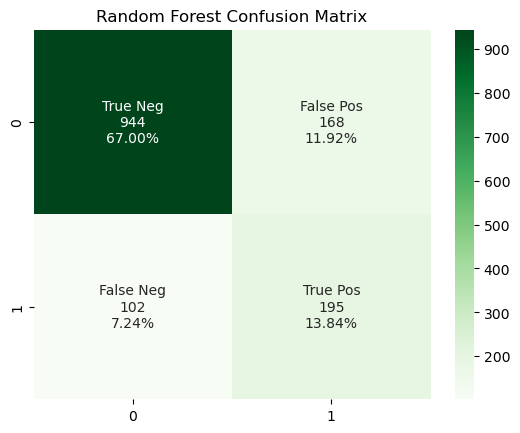

In [19]:
# CONFUSION MATRIX  //  RANDOM FOREST

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_rf.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_rf.flatten()/np.sum(cf_rf)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_rf, annot = labels, fmt = '', cmap = 'Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

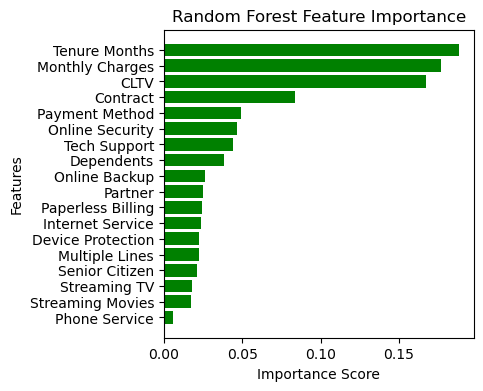

In [20]:
# ------------------
# FEATURE IMPORTANCE // RANDOM FOREST
# ------------------

importance = rf.feature_importances_
features = train_feat.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=True)


plt.figure(figsize=(4,4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color = 'Green')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [21]:
# FEATURE IMPORTANCE //  RANDOM FOREST  //  SUMMARY

print(importance_df)


              Feature  Importance
4       Phone Service    0.006170
12   Streaming Movies    0.017175
11       Streaming TV    0.018175
0      Senior Citizen    0.020922
5      Multiple Lines    0.022253
9   Device Protection    0.022507
6    Internet Service    0.023663
14  Paperless Billing    0.024344
1             Partner    0.024954
8       Online Backup    0.026329
2          Dependents    0.038277
10       Tech Support    0.043880
7     Online Security    0.046534
15     Payment Method    0.049112
13           Contract    0.083530
17               CLTV    0.166955
16    Monthly Charges    0.176901
3       Tenure Months    0.188321


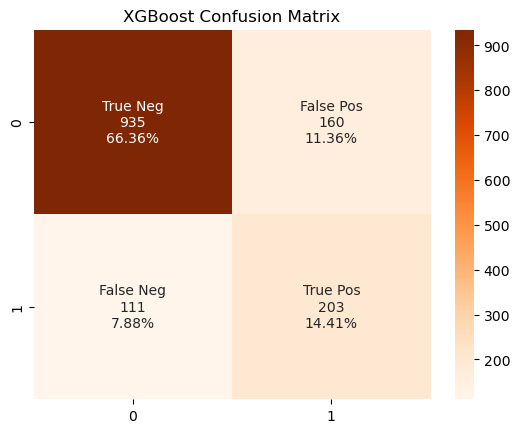

In [22]:
# XGBOOST CONFUSION MATRIX VISUALIZATION 


group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_xg.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_xg.flatten()/np.sum(cf_xg)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_xg, annot = labels, fmt = '', cmap = 'Oranges')
plt.title('XGBoost Confusion Matrix')
plt.show()


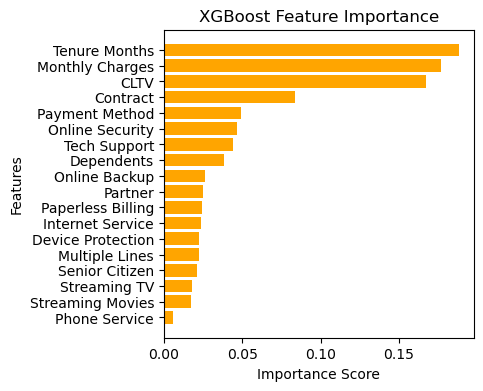

In [23]:
# FEATURE IMPORTANCE // XGBoost Classifier

importance = xg.feature_importances_
features = train_feat.columns
importance_xg = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_xg = importance_df.sort_values('Importance', ascending=True)


plt.figure(figsize=(4,4))
plt.barh(importance_xg['Feature'], importance_xg['Importance'], color = 'Orange')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [24]:
# FEATURE IMPORTANCE // XGBoost  //  SUMMARY

print(importance_xg)


              Feature  Importance
4       Phone Service    0.006170
12   Streaming Movies    0.017175
11       Streaming TV    0.018175
0      Senior Citizen    0.020922
5      Multiple Lines    0.022253
9   Device Protection    0.022507
6    Internet Service    0.023663
14  Paperless Billing    0.024344
1             Partner    0.024954
8       Online Backup    0.026329
2          Dependents    0.038277
10       Tech Support    0.043880
7     Online Security    0.046534
15     Payment Method    0.049112
13           Contract    0.083530
17               CLTV    0.166955
16    Monthly Charges    0.176901
3       Tenure Months    0.188321


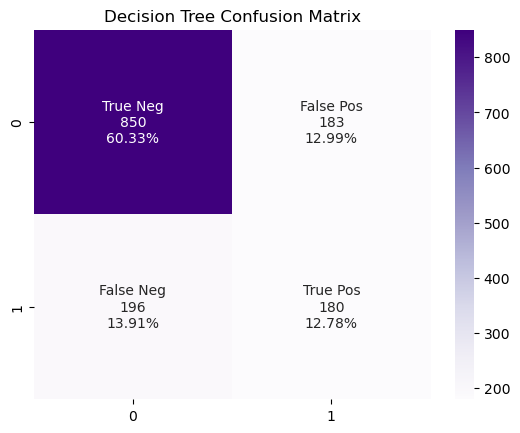

In [25]:
# DECISION TREE CONFUSION MATRIX VISUALIZATION 

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_dt.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_dt.flatten()/np.sum(cf_dt)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_dt, annot = labels, fmt = '', cmap = 'Purples')
plt.title('Decision Tree Confusion Matrix')
plt.show()


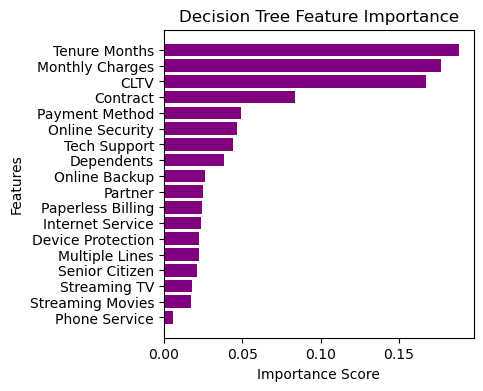

In [26]:
# FEATURE IMPORTANCE // Decision Tree Classifier

importance = dt.feature_importances_
features = train_feat.columns
importance_dt = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_dt = importance_df.sort_values('Importance', ascending=True)


plt.figure(figsize=(4,4))
plt.barh(importance_dt['Feature'], importance_dt['Importance'], color = 'Purple')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## FEATURE CORRELATION

In [28]:
telcorr = df.copy() 

telcorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Senior Citizen     7043 non-null   int64
 1   Partner            7043 non-null   int64
 2   Dependents         7043 non-null   int64
 3   Tenure Months      7043 non-null   int64
 4   Phone Service      7043 non-null   int64
 5   Multiple Lines     7043 non-null   int64
 6   Internet Service   7043 non-null   int64
 7   Online Security    7043 non-null   int64
 8   Online Backup      7043 non-null   int64
 9   Device Protection  7043 non-null   int64
 10  Tech Support       7043 non-null   int64
 11  Streaming TV       7043 non-null   int64
 12  Streaming Movies   7043 non-null   int64
 13  Contract           7043 non-null   int64
 14  Paperless Billing  7043 non-null   int64
 15  Payment Method     7043 non-null   int64
 16  Monthly Charges    7043 non-null   int64
 17  CLTV          

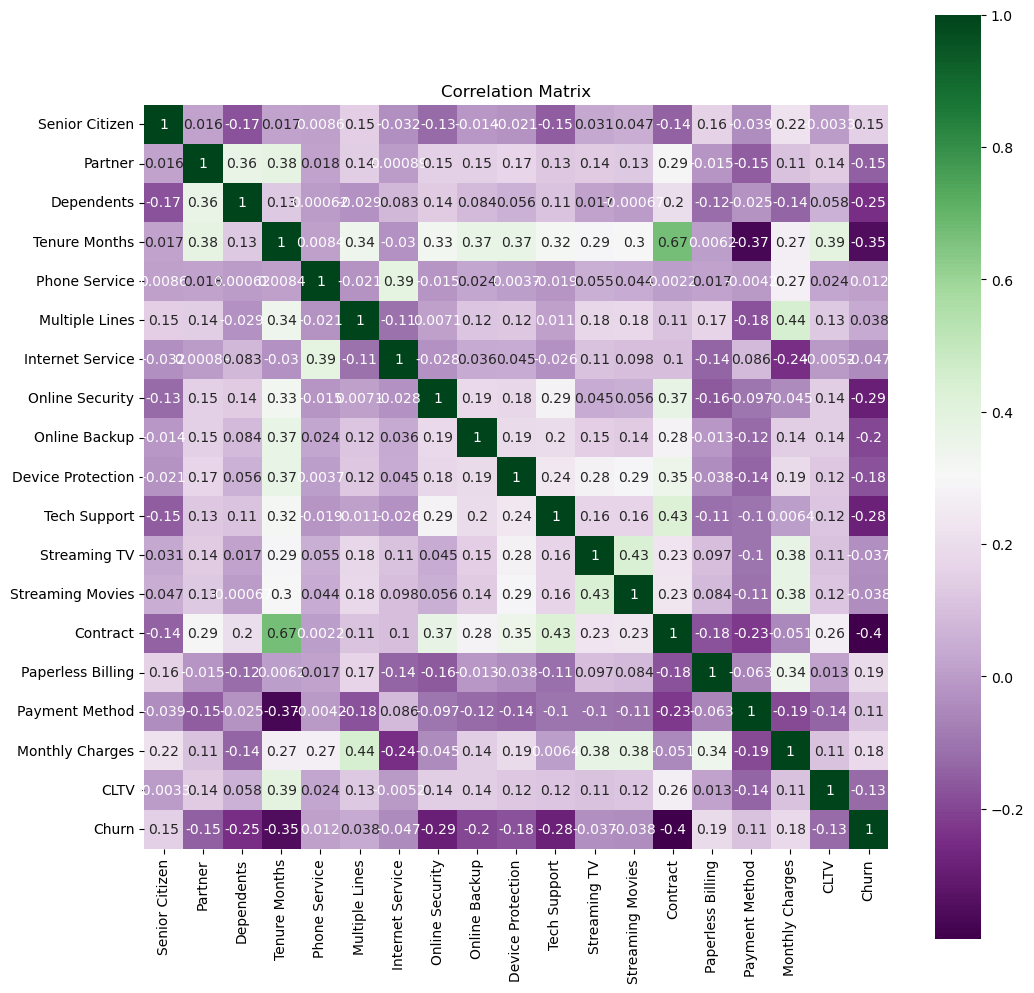

In [30]:
# CORRELATION  //  RANDOM FOREST


corr = df.corr()

plt.figure(figsize=(12,12))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, cmap='PRGn', square=True)

plt.show()